In [18]:
using CurricularAnalytics
using Glob
using CSV
using DataFrames
using Statistics
using StatsPlots

In [19]:
function generate_histogram(complexity_scores, average, std, title; all::Bool=false)
    #kw_args = [:accelerate, :alpha, :backgroundcolor, :color, :colormap, :figsize, :isovalue, :labels, :levels, 
    #:location, :nbins, :rotation, :size, :tilt, :title, :where, :xflip, :xform, :xlabel, :xlim, :xlog, :yflip, 
    #:ylabel, :ylim, :ylog, :zflip, :zlabel, :zlim, :zlog]
    title_hist = "The Average Curriculum Complexity for $title Schools is $average\nwith a standard deviation of $std\n"
    if all 
        hist = StatsPlots.histogram(complexity_scores;nbins=5, title = title_hist, xlabel="Curricular Complexity", 
        #hist = GR.histogram(complexity_scores;nbins=5, xlabel="Complexity",   
            ylabel="Number of Schools",xlim=(0,500), ylim=(0,25), alpha = 0.7, color=:dodgerblue3)
    else
        hist = StatsPlots.histogram(complexity_scores;nbins=5, title = title_hist, xlabel="Curricular Complexity", 
        #hist = GR.histogram(complexity_scores;nbins=5, xlabel="Complexity",
            ylabel="Number of Schools",xlim=(0,500), ylim=(0,15), alpha = 0.7, color=:dodgerblue3)
    end
    return hist
end

generate_histogram (generic function with 1 method)

University of California--San Diego => 117.1
Columbia University => 246.0
Carnegie Mellon University => 139.0
University of California--Los Angeles => 154.5
Cornell University => 118.0
Rice University => 149.0
Princeton University => 77.0
Purdue University => 237.0
University of Michigan--Ann Arbor => 170.0
Virginia Polytechnic Institute and State University => 398.0
Northwestern University => 208.0
California Institute of Technology => 56.2
Stanford University => 59.2
University of Wisconsin => 278.0
Georgia Institute of Technology => 275.0
Texas AM University--College Station => 365.0
University of California--Berkeley => 38.2
Johns Hopkins University => 180.0
Duke University => 133.0
University of Texas--Austin => 171.0
University of Illinois--Urbana-Champaign => 180.0


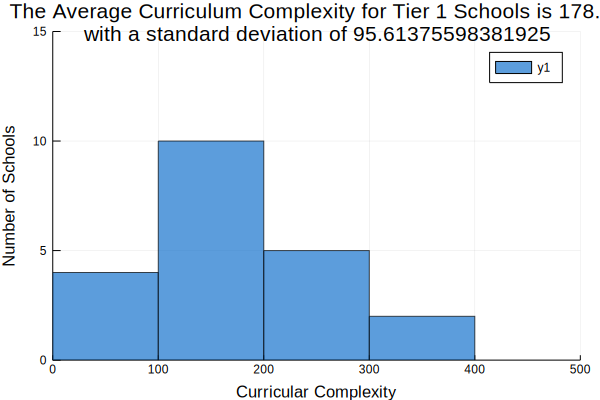

In [20]:
tier1files = glob("*","Tier1")
tier1 = Dict{String, Any}()
for csv_filepath in tier1files
    dp = read_csv(csv_filepath)
    complexity(dp.curriculum)
    curric = dp.curriculum
    tier1[csv_filepath] = dp.curriculum.metrics["complexity"][1]
    if curric.system_type == quarter
        tier1[csv_filepath] = round( tier1[csv_filepath] * 2/3 , digits=1)
    end
end

for (k,v) in tier1
    k = split(split(k, "Tier1/")[2],".")[1]
    println("$k => $v")
end
tier1_complexity_scores = collect(values(tier1))
tier1_schools = collect(keys(tier1))
#T_1_hat is the Tier 1 sample average.
T_1_hat = round(sum(tier1_complexity_scores) / size(tier1_complexity_scores, 1),digits=2)
tier1_std = round(std(tier1_complexity_scores),digits=243)

first_tier = generate_histogram(tier1_complexity_scores, T_1_hat, tier1_std, "Tier 1")

University of Alabama => 291.0
University of Missouri => 207.0
New Jersey Institute of Technology => 402.0
Louisiana State University--Baton Rouge => 270.0
University of Arkansas--Fayetteville => 223.0
University of Houston => 500.0
George Washington University => 306.0
San Diego State University => 286.0
Brigham Young University => 283.0
University of Miami => 200.0
Clarkson University => 213.0
University of Oklahoma => 242.0
Indiana University-Purdue University--Indianapolis => 262.0
Oklahoma State University => 308.0
University of California--Riverside => 187.3
University of Cincinnati => 172.0
University of Kentucky => 236.0
University of North Carolina--Charlotte => 433.0
University of California--Santa Cruz => 122.4
Texas Tech University => 300.0
Embry-Riddle Aeronautical University => 336.0


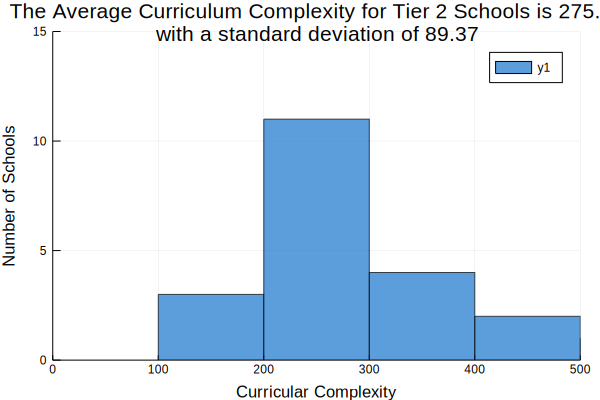

In [21]:
tier2files = glob("*","Tier2")

tier2 = Dict{String, Any}()
for csv_filepath in tier2files
    dp = read_csv(csv_filepath)
    complexity(dp.curriculum)
    curric = dp.curriculum
    tier2[csv_filepath] = dp.curriculum.metrics["complexity"][1]
    if curric.system_type == quarter
        tier2[csv_filepath] = round( tier2[csv_filepath] * 2/3 , digits=1)
    end
end
for (k,v) in tier2
    k = split(split(k, "Tier2/")[2],".")[1]
    println("$k => $v")
end

tier2_complexity_scores = collect(values(tier2));
tier2_schools = collect(keys(tier2));
#T_2_hat is the Tier 2 sample average.
T_2_hat = round(sum(tier2_complexity_scores) / size(tier2_complexity_scores, 1),digits=2);
tier2_std = round(std(tier2_complexity_scores),digits=2);
second_tier = generate_histogram(tier2_complexity_scores, T_2_hat, tier2_std, "Tier 2")

San Diego State University => 386.0
Tennessee State University => 489.0
University of Missouri--Kansas City => 485.0
Prairie View AM University => 367.0
University of North Dakota => 354.0
University of New Orleans => 256.0
University of Bridgeport => 167.0
Tuskegee University => 384.0
Texas AM University--Kingsville => 344.0
University of Louisiana--Lafayette => 323.0
University of Denver => 353.0
Western Michigan University => 300.0
Lamar University => 327.0
University of Detroit Mercy => 392.0
Florida Atlantic University => 294.0
Texas State University => 266.0
Jackson State University => 298.0
Morgan State University => 303.0
University of North Texas => 363.0
Oakland University => 232.0
University of Tennessee--Chattanooga => 394.0


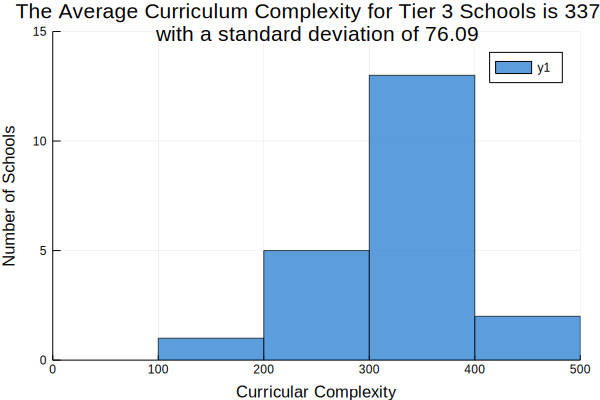

In [22]:
tier3files = glob("*","Tier3")

tier3 = Dict{String, Any}()
for csv_filepath in tier3files
    dp = read_csv(csv_filepath)
    complexity(dp.curriculum)
    curric = dp.curriculum
    tier3[csv_filepath] = dp.curriculum.metrics["complexity"][1]
    if curric.system_type == quarter
        tier3[csv_filepath] = round( tier3[csv_filepath] * 2/3 , digits=1)
    end
end
for (k,v) in tier3
    k = split(split(k, "Tier3/")[2],".")[1]
    println("$k => $v")
end

tier3_complexity_scores = collect(values(tier3));
tier3_schools = collect(keys(tier3));
#T_3_hat is the Tier 3 sample average.
T_3_hat = round(sum(tier3_complexity_scores) / size(tier3_complexity_scores, 1),digits=2);
tier3_std = round(std(tier3_complexity_scores),digits=2);
third_tier = generate_histogram(tier3_complexity_scores, T_3_hat, tier3_std, "Tier 3")

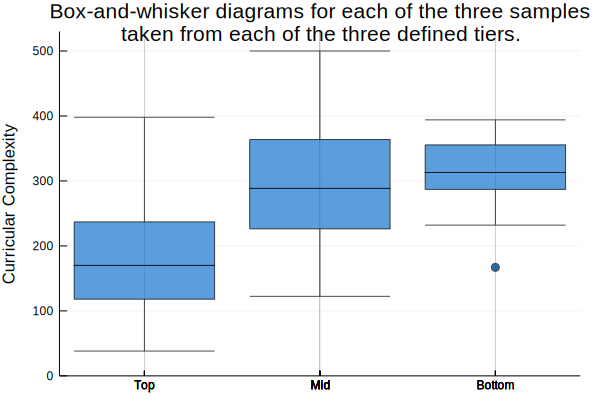

In [23]:
title_box="Box-and-whisker diagrams for each of the three samples\ntaken from each of the three defined tiers."
plot_ylabel = "Curricular Complexity"
plot_xlabel = ""
tier = [repeat(["  Top"], 21); repeat([" Mid"], 26); repeat(["Bottom"], 21)]
boxplot(tier, [tier1_complexity_scores;tier2_complexity_scores;tier3_complexity_scores],leg=false;ylim=(0,530),
    title=title_box, ylabel=plot_ylabel, xlabel=plot_xlabel,alpha = 0.7, color=:dodgerblue3)

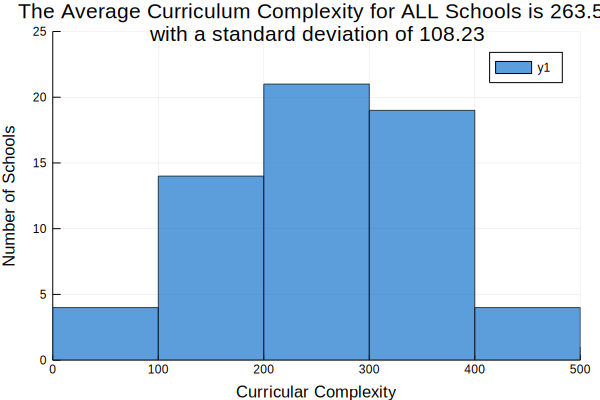

In [24]:
all_scores = vcat(tier1_complexity_scores, tier2_complexity_scores, tier3_complexity_scores)
#cc_hat is the sample average of al tiers.
cc_hat = round(sum(all_scores) / size(all_scores, 1), digits=2)
all_scores_std = round(std(all_scores), digits=2)
all_tier = generate_histogram(all_scores, cc_hat, all_scores_std, "ALL"; all=true)

Let $n_1, n_2$ and $n_3$ be the sample sizes drawn from top, medium and low tier schools, respectively, with $n = n_1 + n_2 + n_3$.

In [25]:
n_1 = length(tier1)
n_2 = length(tier2)
n_3 = length(tier3)

n = n_1 + n_2 +n_3

63

\begin{equation}
 TSS = \sum_{i=1}^3 \sum_{j=1}^{n_i} \left(cc_{ij} - \overline{cc}\right)^2
\end{equation}

where $TSS$ denotes the total sum of squares of deviations, and $\overline{cc}$ is the sample mean for all samples drawn over all tiers.

In [26]:
# Combined TSS 
TSS =0.0
for cc_ij in values(tier1)
    TSS += (cc_ij - cc_hat) ^ 2
end
for cc_ij in values(tier2)
    TSS += (cc_ij - cc_hat) ^ 2
end
for cc_ij in values(tier3)
    TSS += (cc_ij - cc_hat) ^ 2
end
TSS = round(TSS, digits=2)

726301.02

\begin{equation}
 TSS = SST + SSE
\end{equation}
where $SST$ represents the sum of squares of the deviations between the tiers, and SSE is the sum of squares attributed to errors or noise. SST can be calculated as: 
\begin{equation}
 SST = \sum_{i=1}^3 n_i\left(\overline{T}_i - \overline{cc}\right)^2
\end{equation}
where $T_i$ is the total curricular complexity of the schools sampled from the $i$-th tier, and $\overline{T}_i = T_i/n_i, i = 1,2,3$, are the tier sample averages.

In [27]:
#Seperated Calculation (SST +SSE)
# SST 
SST =  round(length(tier1)*((T_1_hat - cc_hat)^2) + length(tier1)*((T_2_hat - cc_hat)^2) + length(tier1)*((T_3_hat - cc_hat)^2),digits=2)

267949.26

The value of SSE can be calculated as: 
\begin{equation}
 SSE = {\sum_{i=1}^3 \sum_{j=1}^{n_i} \left(cc_{ij} - \bar{T}_i\right)^2}
\end{equation}

In [28]:
# SSE
SSE = 0.0
for cc_ij in values(tier1)
    SSE += (cc_ij - T_1_hat) ^ 2
end
for cc_ij in values(tier2)
    SSE += (cc_ij - T_2_hat) ^ 2
end
for cc_ij in values(tier3)
    SSE += (cc_ij - T_3_hat) ^ 2
end
SSE = round(SSE, digits=2)
println(SST)
println(SSE)
println(SST+SSE)


267949.26
458361.81
726311.0700000001


\begin{equation}
 MSE = {SSE \over n - 3}
\end{equation}

In [29]:
MSE = round(SSE / (n-3), digits=2)

7639.36

\begin{equation}
 MST = {SST \over 2}
\end{equation}

In [30]:
MST = round(SST / 2, digits=2)

133974.63

The $F$-test statistic is given by
\begin{equation}
F = {MST \over MSE}
\end{equation}

In [31]:
F = round(MST / MSE, digits=2)

17.54

In [32]:
println("Source\tSS\t\tdf\t\tMS\t\tF")
println("Groups\t$SST\t2\t\t$MST\t$F")
println("Error\t$SSE\t$(n-3)\t\t$MSE")
println("Totals\t$(SST+SSE)\t$(n-1)")

Source	SS		df		MS		F
Groups	267949.26	2		133974.63	17.54
Error	458361.81	60		7639.36
Totals	726311.0700000001	62


In [33]:
tier = [repeat(["  Top"], 21); repeat([" Mid"], 26); repeat(["Bottom"], 21)]
plot_title = "Box plot for ANOVA statistics"
plot_ylabel = "Curricular Complexity"
plot_xlabel = ""

""

┌ Warning: Boxplot's notch went outside hinges. Set notch to false.
└ @ StatsPlots /Users/orhanabar/.julia/packages/StatsPlots/vXig7/src/boxplot.jl:36


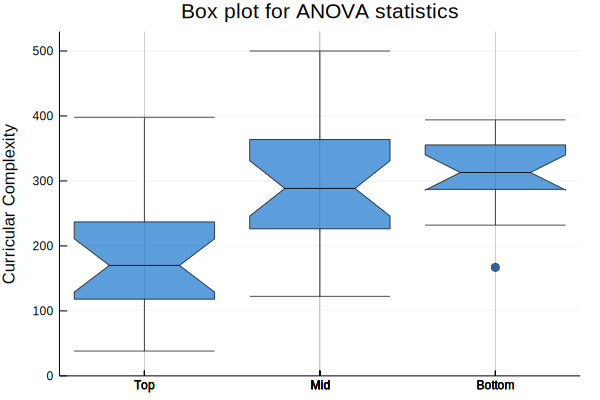

In [34]:
boxplot(tier, [tier1_complexity_scores;tier2_complexity_scores;tier3_complexity_scores],
    leg=false;notch=true,ylim=(0,530),title=plot_title, ylabel=plot_ylabel, xlabel=plot_xlabel,alpha = 0.7, color=:dodgerblue3)